In [268]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

train_data = pd.read_csv("./data/train.csv",encoding="UTF-8")
test_data = pd.read_csv("./data/test.csv", encoding="UTF-8")

#데이터 속성 확인
print("[train data 데이터 타입] \n", train_data.dtypes, sep='\n')
print("\n [test data 데이터 타입] \n", test_data.dtypes, sep='\n')

[train data 데이터 타입] 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 [test data 데이터 타입] 

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [269]:
#train data 결측치 확인

def check_missing_col(dataframe) :
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns) :
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >=1 else False
        if is_missing :
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은 : {col}입니다.')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col_train = check_missing_col(train_data)

결측치가 있는 컬럼은 : Age입니다.
해당 컬럼에 총 177개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Cabin입니다.
해당 컬럼에 총 687개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Embarked입니다.
해당 컬럼에 총 2개의 결측치가 존재합니다.


In [270]:
#test data 결측치 확인
def check_missing_col(dataframe) :
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns) :
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >=1 else False
        if is_missing :
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은 : {col}입니다.')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col_test = check_missing_col(test_data)

결측치가 있는 컬럼은 : Age입니다.
해당 컬럼에 총 86개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Fare입니다.
해당 컬럼에 총 1개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : Cabin입니다.
해당 컬럼에 총 327개의 결측치가 존재합니다.


In [271]:
# PassengerId, Name, 결측치가 가장 많은 Cabin 컬럼, Ticket 삭제 - 데이터 분석에 영향이 매우 적기 때문 
train_data = train_data.drop(['PassengerId', 'Name','Cabin', 'Ticket'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name','Cabin', 'Ticket'], axis=1)

print("train data 컬럼 삭제 확인 : ", train_data.columns )
print("test data 컬럼 삭제 확인 : ", test_data.columns )

train data 컬럼 삭제 확인 :  Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
test data 컬럼 삭제 확인 :  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [214]:
# train data 결측치 행 확인
train_data[train_data.isna().sum(axis=1)>0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [272]:
#Embarked 결측치 대체
train_data.fillna({'Embarked' : "S"}, inplace=True)

In [273]:
#Train data 사망 - 성별 Age 평균 대체
fill_death = {"female" : 25, 'male': 31}
death_func = lambda d: d.fillna(fill_death[d.name])

death_train = train_data[train_data['Survived']==0]
death_train = death_train.groupby("Sex").apply(death_func)

# 결측치 확인
death_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [277]:
#Train data 생존 - 성별 Age 평균 대체

fill_surv = {'female' : 29, 'male' : 27}
surv_func = lambda d : d.fillna(fill_surv[d.name])

surv_train = train_data[train_data["Survived"]==1]
surv_train = surv_train.groupby("Sex").apply(surv_func)

#결측치 확인
surv_train.isna().sum()

# 데이터 재결합
train_data = pd.concat([death_train,surv_train])

In [278]:
# test data 결측치 행 확인
test_data[test_data.isna().sum(axis=1)>0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C
33,3,female,NaN,1,2,23.4500,S
36,3,female,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...
408,3,female,NaN,0,0,7.7208,Q
410,3,female,NaN,0,0,7.7500,Q
413,3,male,NaN,0,0,8.0500,S
416,3,male,NaN,0,0,8.0500,S


In [279]:
#test data fare 결측치 대체
test_data.fillna({'Fare' : test_data.Fare.mean()}, inplace=True)

In [280]:
# test 데이터 성별 그룹 합계
test_data.groupby(["Sex"]).mean()

,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,
female,2.144737,30.272362,0.565789,0.598684,49.747699
male,2.334586,30.272732,0.379699,0.274436,27.558326


In [281]:
#test data 생존 - 성별 Age 평균 대체

fill_val = {'female' : 30, 'male' : 30}
fill_func = lambda d : d.fillna(fill_val[d.name])

test_data = test_data.groupby("Sex").apply(fill_func)

#결측치 확인
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

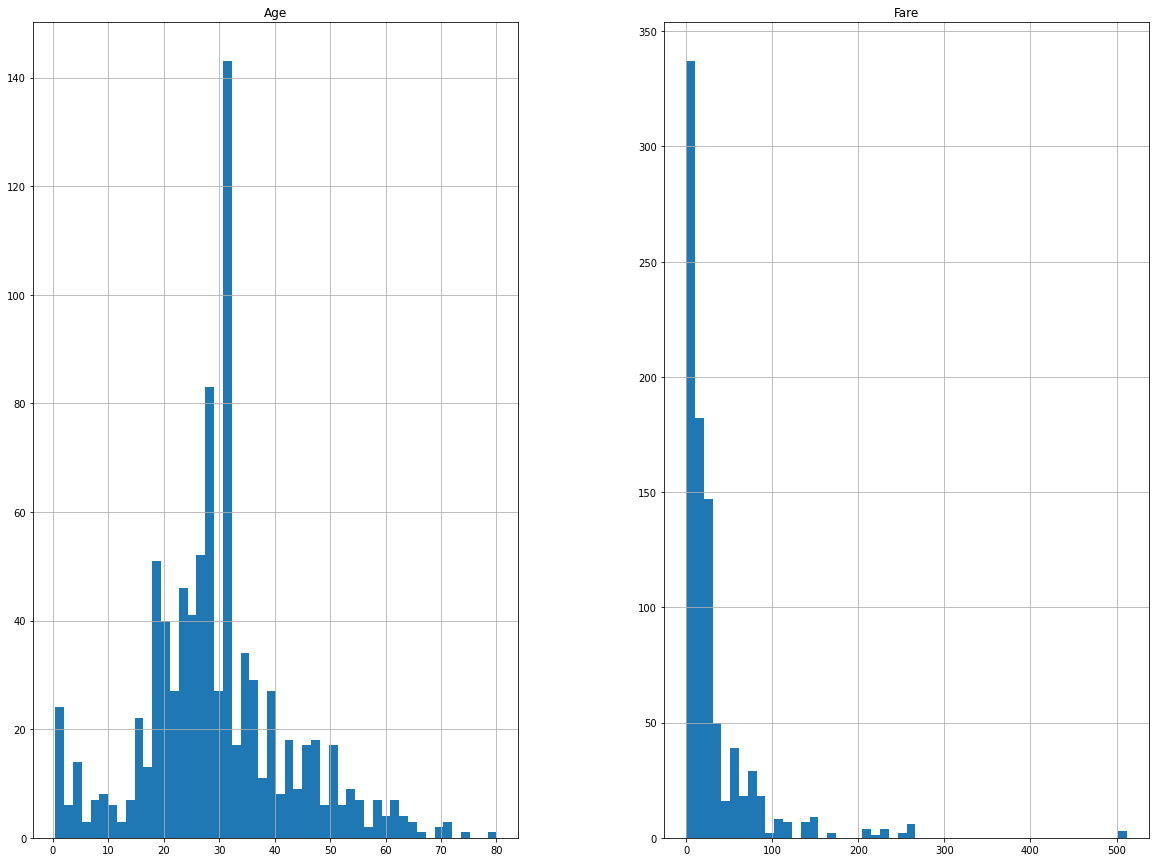

In [282]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

train_data[["Age","Fare"]].hist(bins=50,figsize=(20,15))
plt.show()

In [283]:
from sklearn.preprocessing import LabelEncoder

corr_df = train_data.copy()
corr_df[corr_df.columns[corr_df.dtypes=="O"]] = corr_df[corr_df.columns[corr_df.dtypes=="O"]].astype(str).apply(LabelEncoder().fit_transform) 

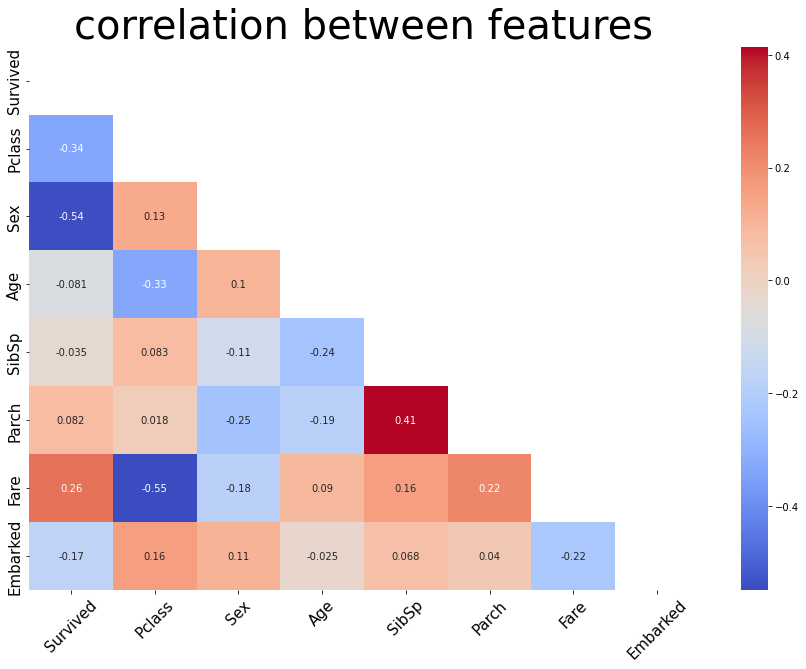

In [284]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [309]:
# 데이터 분할
X = train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
X = pd.get_dummies(X, columns=['Sex',"Embarked"])
y = train_data[["Survived"]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# 데이터 전처리
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [313]:
#모델적용 - 랜덤 포레스트 회귀분석

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_scaled_train,y_train)
pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)
print("train set 모델 스코어 : ", model.score(X_scaled_train,y_train))
print("test set 모델 스코어 : ", model.score(X_scaled_test,y_test))

train set 모델 스코어 :  0.9940119760479041
test set 모델 스코어 :  0.8116591928251121


In [318]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_train = confusion_matrix(y_train, pred_train)
print("Train 데이터 오차 행렬 : \n", confusion_train)

cfreport_train = classification_report(y_train, pred_train)
print("Train 데이터 분류 레포트 : \n", cfreport_train)


confusion_test = confusion_matrix(y_test, pred_test)
print("Test 데이터 오차 행렬 : \n", confusion_test)

cfreport_test = classification_report(y_test, pred_test)
print("Test 데이터 분류 레포트 : \n", cfreport_test)


Train 데이터 오차 행렬 : 
 [[400   1]
 [  3 264]]
Train 데이터 분류 레포트 : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       401
           1       1.00      0.99      0.99       267

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668

Test 데이터 오차 행렬 : 
 [[126  22]
 [ 20  55]]
Test 데이터 분류 레포트 : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       148
           1       0.71      0.73      0.72        75

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [321]:
# 랜덤 서치 하이퍼 파라미터 찾기
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"n_estimators" : randint(low=1, high=1000),
                 "max_features" : ['auto','sqrt','log2']}

random_search = RandomizedSearchCV(model, param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002648D9A9490>})

In [322]:
# best 파라미터, best score
print("Best Parameter : {}".format(random_search.best_params_))
print("Best Score : {:.4f}".format(random_search.best_score_))
print("Test Set Score : {:.4f}".format(random_search.score(X_scaled_test,y_test)))


Best Parameter : {'max_features': 'auto', 'n_estimators': 362}
Best Score : 0.8144
Test Set Score : 0.8072


In [337]:
#test 데이터 더미 변수 생성
#pd.get_dummies(test_data,columns=["Sex", "Embarked"])
test_data
#테스트 데이터 정규화
test_scaled = scaler.transform(test_data)

In [334]:
#하이퍼 파라미터 조정 후 test 데이터 적용

model_test = RandomForestClassifier(max_features = "auto", n_estimators = 362)
model_test.fit(X_scaled_train, y_train)
test_pred = model_test.predict(test_scaled)

In [336]:
#submission 제출
submission = pd.read_csv("./data/gender_submission.csv", encoding="UTF-8")
submission["Survived"] = test_pred
submission.to_csv("./data/submission(final).csv", encoding="UTF-8", header=True, index=False)